# Random Processes in Physics - Lab 2

1. Review of last lab - especially techniques to draw random numbers from non-uniform distributions. 
2. Gaussian Random Numbers
   - example modelling Rutherford scattering of a Gaussian beam of particles. 
3. How random is random? 
4. Monte Carlo Integration
    - example integrating a pathological function
    - how accurate is Monte Carlo Integration? 
    - the Mean Value Method
    - why bother with Monte Carlo Integration? 

## Gaussian Random Numbers

 One of the most common distributions you will need to draw numbers from is the Gaussian Distribution: 
 
 $$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp{(\frac{-x^2}{2 \sigma^2}}) $$
 
 Where of course, $\sigma$ is the width (standard deviation) of the distribution, which in the above case has a zero mean. The division by $\sqrt{2 \pi \sigma^2}$ is necessary so that the total probability integrates to unity over $\pm \infty$. 
 
 Using the transformation method to generate numbers from this distribution is not possible, as it is not possible to do the integral: 
 
 $$ \int_{-\infty}^x \exp({\frac{-x^2}{2 \sigma^2}}) dx $$
 
 However it is possible to make use of a co-ordinate transformation to generate two sets of Gaussian distributed random numbers rather efficiently. 
 
 Consider two independent random numbers drawn from the Gaussian distribution: 
 
 $ p(x)   = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{(\frac{-x^2}{2 \sigma^2})}  $
 
 and
 
 $p(y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{(\frac{-y^2}{2 \sigma^2})} $
 
 then
 
 $ p(x)p(y)dx dy = \frac{1}{2 \pi \sigma^2}\exp{-(\frac{x^2+y^2}{2 \sigma^2})} dx dy $. 
 
 We can convert this to polar co-ordinates ($x = r\cos\phi$; $y=r\sin\phi$) using $r^2 = x^2 +y^2$ and $dx dy = r dr d\phi$, so then
 
 $p(r,\phi) dr d\phi = \frac{1}{2 \pi \sigma^2} \exp{(\frac{-r^2}{2 \sigma^2})} r dr d\phi $

this can be separated into $p(r)$ and $p(\phi)$ as follows: 

 $p(r) = \frac{r}{ \sigma^2}\exp{(\frac{-r^2}{2 \sigma^2}}) $

and 

 $p(\phi) = 1/2\pi$

(ie. uniform random numbers in $\phi$). 

And we can now integrate $p(r)$ in to make use of the transformation method to generate random numbers $r$ from uniform random numbers, $z$. If you do the necessary integral you will find the relationship is $r = \sqrt{-2\sigma^2 \ln(1-z)}$. You can then convert $r$ and $\phi$ to $x$, $y$ co-ordinates to generate two sets of random Gaussianally distributed numbers. 

Summary of the method to generate two sets of random numbers distributed as Gaussians:  

1. Generate two random numbers, $z$ and $\phi$. 
2. Transform $z$ to numbers, $r$ distributed as $p(r)$ above, with $r = \sqrt{-2\sigma^2 \ln(1-z)}$
3. Transform to two sets of Gaussian distributed random numbers, $x$ and $y$ with $x = r\cos\phi$ and $y = r\cos \phi$.  

## In Class Exercise - Rutherford Scattering of a Gaussian Beam of Particles

![Rutherford Scattering](rutherford-scattering.png "Rutherford Scattering")

When a positively charged particle passes close to an atom, its path will be deflected (or scatter) by an angle $\theta$ which obeys the relation: 

$$\tan (\theta/2) = \frac{Z e^2}{2 \pi \epsilon_0 E b} $$

where $Z$ is the atomic number, $e$ is the electric charge, $\epsilon_0$ is the permittivity of free space, $E$ is the kinetic energy of the incident particle, and $b$ is the impact parameter (see diagram). 

This process is called "Rutherford Scattering" after Ernest Rutherford, who was among the first physicists to explore this process. He was famously astonished to find in 1909 that a fraction of incident $\alpha$ particles on a thin sheet of Gold bounced back, because the time it was not known that atoms contained atomic nuclei. He said this observation "was about as credible as if you had fired a 15-inch shell at a piece of tissue paper and it had come back and hit you".

We will model a beam of 1 million $\alpha$ particles with a 2D Gaussian profile incident on a single atom of Gold. We would like to calculate the fraction of these particles which "bounce back" (ie. scatter through angles greater than $\theta = 90^\circ$. 

When bounce back happens, therefore $\tan (\theta/2) \gt 1$, so 

$$ b \lt \frac{Z e^2}{2 \pi \epsilon_0 E} $$

We will write a programme which simulates the incident Gaussian beam and calculates the fraction of particles which bounce back. 

Please write your own function to calculate Gaussian random numbers using this format: 

``` python

def gaussian():```

YOUR ALGORTHIM HERE

``` python 

return x,y```


Make use of these parameters for the incident beam, which should be randomly sampled from a 2D Gaussian: 

1. E = 7.7 MeV
2. $\sigma = a_0/100$ (where $a_0$ is the Bohr radius). 


Hint: you can make use of the ```astropy.constants``` module to import various constants you need for this problem. 

Hint: Don't forget that in your Random number generator, both $z(r)$ and $\phi$ are uniform random numbers from 0 to 1 which can be used to generate $x$ and $y$ as random numbers from a Gaussian distribution. 

In [7]:
from astropy import constants as const
print(const.e)

  Name   = Electron charge
  Value  = 1.602176565e-19
  Uncertainty  = 3.5e-27
  Unit  = C
  Reference = CODATA 2010


To find the available constants use: 

In [11]:
?const


Have to be careful about combining units. You will get error messages about potential mismatching units, and need to define the units of your programme variables. In the long run (once you get used to python classes) this is a good thing (will make sure your calculations are physical). 

However, if you are sure you are in the same system with all constants, it may be quicker for short programmes to use:  

In [9]:
print(const.c.value)

299792458.0


A reminder about functions: 

In [10]:
#Function
def HelloWorld():
    print("Hello World")
    x = 13
    y = 8
    return x, y

#Main Programme

print("This is a programme which says Hello World and returns my favourite numbers")
x,y=HelloWorld()
print("My favourite numbers are: ",x,y)

This is a programme which says Hello World and returns my favourite numbers
Hello World
My favourite numbers are:  13 8


## How Random is Random? 

Now we have looked at several techniques for drawing random numbers from distributions which are uniform, or non-uniform, let's pause to consider them a bit more.  How do we know that the "random" numbers we are getting are random enough?  We already know that they can't ever be considered truly random, but surely there is some way to say with confidence that the numbers we obtain are good enough.  To do that, we can apply a series of statistical tests on a large sample of random numbers to see if they are statistically sound.  

A good overview of the problem from which this discussion is drawn is provided in [Chapter 10](http://www.johndcook.com/Beautiful_Testing_ch10.pdf) of the book "Beautiful Testing", written by John D. Cook.  He makes the chapter available online for free through his [webpage](http://www.johndcook.com).  

The most straightforward statistical tests we can apply are

* Mean test
* Variance test

### Mean test

The mean test is as you would expect.  Generate a large sample of random numbers and compute their mean.  

$$m = \frac{1}{n}\sum_{i=1}^n x_i$$

Then compare to the expected mean value for the distribution you are sampling from.  For example, for uniform numbers between 0 and 1, you'd expect a mean of 0.5.

### Variance test

For the variance test, compute the variance for a large sample of data with

$$\sigma^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - m)^2$$

$\sigma$ is the standard deviation of the mean and for a large data sample should approximate that of the normal distribution, where 68% of all values should fall within one standard deviation, 95% should fall within 2 standard deviations, and so on. You can check your distribution of samples by computing the percentage of random numbers that fall within the appropriate ranges.  

### Other Tests

Sometimes there isn't a well defined mean or $sigma$ to test your samples against. In these circumstances other tests are available. For example: 

* Chi-square or "Bucket" test
* Kolmogorov-Smirnov (KS) Test

In the Chi-square test, we calculate the mean deviation from the expected function in bins (identical to calculating how well a model fits experimental data):  

$$\chi^2 = \sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}$$

If $\chi^2$ is too large, the numbers we sampled do not follow the distribution we desire and should not be used.  If $\chi^2$ is too low, our numbers are not random enough - they are too predictable.  

 The KS test is also commonly used in comparing experimental samples. It measures the similarlty between two sets of data and determines the probability they are drawn from the same parent distribution. Like in the Chi-squared test, we don't want the match to be too perfect, but the distributions should be not too different either, and determining the range of acceptable values depends on the application. 

## Monte Carlo Integration 

There is an analytic expression for the fraction of $\alpha$ particles which are bounced back. Notice that we discovered the impact parameter is a random number drawn from this distribution: 

$$p(r) = \frac{r}{\sqrt{ \sigma^2}}\exp{(\frac{-r^2}{2 \sigma^2}}) $$

So we could calculate the fraction of values of $r<b$ by doing the integral: 

$$\frac{1}{\sqrt{ \sigma^2}} \int_0^b \exp{(\frac{-r^2}{2 \sigma^2}}) r dr$$

This can be done analytically, but notice that the code you have just written calculates it from a random sampling. 

Not all functions can be integrated analytically, because they have pathological behaviour. Instead we can calculate such integrals making use of random sampling...

For a concrete example consider: 

$$ I = \int_0^2 \sin^2 [\frac{1}{x(2-x)}] dx. $$

Plotting this function: 

/Users/Karen/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karen/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sin


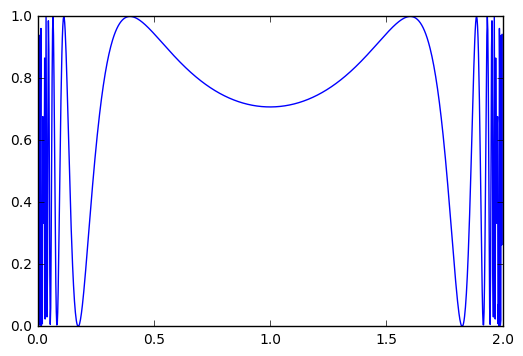

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2,1000)
y = (np.sin(1/(x*(2-x))))**2

plt.plot(x,y)

Notice the pathological behaviour at the x-axis values near $x=0$ and $x=2$. 

The approximate value of the integral can be calculated using a method rather similar to the rejection method for drawing random numbers from arbitrary distributions: 

1. Call the area of the above plot $A$.
2. The probability of a random point in the area $A$ falling under the curve is then $ p = I/A $. 
3. Generate a large number, $N$ of random numbers uniformly distributed across $A$. 
4. Count the number which fall under the curve, $k$. 
5. The probability of being under the curve is approximately equal to $k/N$ (within some numerical error). 
6. Finally: $ I \simeq kA/N$. 

This is often called the "hit or miss" method of integration. 

## In Class Exercise: Monte Carlo Integration

Write a programme following the method of Monte Carlo Integration to calculate 

$$ I = \int_0^2 \sin^2 [\frac{1}{x(2-x)}] dx. $$


As you will need to calculate $f(x) = \sin^2 [\frac{1}{x(2-x)}]$ many times please write a user defined function for this part of your programme. 

## How Accurate is "Hit or Miss" Monte Carlo Integration? 

Consider the probability that a point falls below the curve, $p$. The probability it is above the curve is then $1-p$. In a given $N$ particles, the probability that $k$ are below the curve and $(N-k)$ are above it is then: 

$$ P(k) = ^NP_k ~~ p^k (1-p)^{N-k} $$

This is simply the binomial distribution, and the expected standard distribution of the number of particles below the curve is 

$$\sigma_k = \sqrt(Np(1-p)) $$

since $I = kA/n$ this carries forward to an error on the integral of: 

$$\sigma_I = \frac{\sqrt{I(A-I)}}{\sqrt(N)} $$

so the only way to increase the accuracy for a given function is to increase $N$. 

As a rule of thumb the accuracy is $\sqrt(N)$ %, ie. for 100 samples, you can expect an accuracy of 10 %. Other methods for calculating integrals are much more accurate for the same  number of samples (you should cover some of these methods later in the unit), and so this method should be used only as a last resort. 

## In Class Exercise

Returning to the programme you just wrote to calculate the integral of $f(x) = \sin^2 [\frac{1}{x(2-x)}]$, please now add an estimate of the accuracy of your integration. 

## The Mean Value Method

An alternative Monte Carlo (random) method for integration, is the "Mean Value Method". 

Recall the definition of the mean of a function across the range [a,b], includes it's integral: 

$$<f> = \frac{1}{b-a} \int_a^b f(x) dx = \frac{I}{b-a} $$

So if we can estimate $<f>$ we can estimate $I$. 

A simple way to estimate $<f>$ is just to calculate $N$ random values drawn from the distribition, and calculate their mean value. Then: 

$$ I = (b-a)<f> $$

The error on this estimate is: 

$$\sigma_I = (b-a)\frac{\sigma_f}{\sqrt(N)} $$

which like the previous Monte Carlo method scales with $\sqrt N$, however has a smaller constant of proportionalility. 

## In Class Exercise

Now calculate the integral of $f(x) = \sin^2 [\frac{1}{x(2-x)}]$ using the mean value method, and compare the accuracy from 10000 sample to what you obtained previously. 

## Why Bother with this? 

If other methods of integration are quicker, why would we bother with these random sampling methods? 

There are at least two circustances where they are useful: 

1. When the function is impossible to integrate by other methods. 
2. For N-dimensional integration. Other methods (see later in the unit) may require millions of samples (e.g. 100 points per axis in 4-D is 100 million points), but the volume can be randomly sampled by a few 10s of thousands of points. One real world example where the dimensionality is high is financial models for the value of stocks and bonds, which may contain many variables, and are required to be done quickly to make purchasing decisions. 